# Homework 3
## Generalization Error
### Question 1
The modified Hoeffding Inequality provides a way to characterize the generalization error with a probabilistic bound  

$$P[|E_{in}(g)-E_{out}(g)|>\epsilon]\leq 2Me^{-2\epsilon^2N}$$  

for any $\epsilon > 0$. If we set $\epsilon = 0.05$ and want the probability bound $2Me^{-2\epsilon^2N}$ to be at most 0.03, what is the least number of examples $N$ (among the given choices) needed for the case $M = 1$?

Answer: First we simplify the RHS od the Hoeffding inequality as we are interested in $N$ only  

$$\begin{align}
P[|E_{in}(g)-E_{out}(g)|>\epsilon]\leq 2Me^{-2\epsilon^2N} &\leq \text{bound} \\
N &\leq \frac {log(\frac {\text{bound}}{2M})}{-2\epsilon^2}
\end{align}
$$

Now, let's visualize the above inequality to see what actually happens as we incerase $M$.

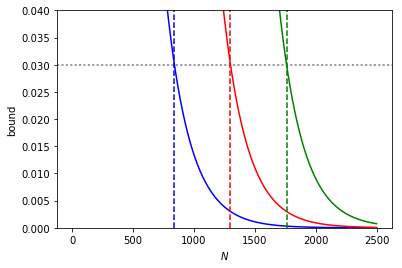

In [2]:
import matplotlib.pyplot as plt
import numpy as np

M1 = 1
M2 = 10
M3 = 100
epsilon = 0.05
bound = 0.03

x = np.arange(0,2500,.01)
#x = np.linspace(0, 2000, 100)
y1 = 2*M1*np.exp(-2*x*epsilon**2)
y2 = 2*M2*np.exp(-2*x*epsilon**2)
y3 = 2*M3*np.exp(-2*x*epsilon**2)
plt.plot(x, y1, c='blue')
plt.plot(x, y2, c='red')
plt.plot(x, y3, c='green')
plt.axhline(y=bound, c='grey', ls = ':')
plt.axvline(x=np.log(bound/(2*M1))/(-2*epsilon**2), c='b', ls = '--')
plt.axvline(x=np.log(bound/(2*M2))/(-2*epsilon**2), c='r', ls = '--')
plt.axvline(x=np.log(bound/(2*M3))/(-2*epsilon**2), c='g', ls = '--')
plt.ylim(0,(bound+0.01)) # put limits on the y-axis as defined by the problem
plt.xlabel('$N$') # N samples
plt.ylabel('bound') # RHS of the inequality
plt.show()

We can infer the required $N$ for defined $\epsilon$ from the above figure quite clearly, but let's compute the exact values as well. Also, note that as we are making the bound *tighter* the requirements for N increase further.

In [3]:
N1 = np.log(bound/(2*M1))/(-2*epsilon**2)

print('The least number of example N needed: ', 
      min([500, 1000, 1500, 2000], key=lambda x:abs(x-N1)),
     ' with N equal to ', N1)

The least number of example N needed:  1000  with N equal to  839.941015576


Answer: (b)

### Question 2
Repeat for the case $M = 10$.

In [4]:
N2 = np.log(bound/(2*M2))/(-2*epsilon**2)

print('The least number of example N needed: ', 
      min([500, 1000, 1500, 2000], key=lambda x:abs(x-N2)),
     ' with N equal to ', N2)

The least number of example N needed:  1500  with N equal to  1300.45803417


Answer: (c). This is natural to expect that as we increase the number of hypothesis we will need more sample points for keep the difference between the in-sample and out-of-sample error within the desired bound i.e. epsilon. 

### Question 3
Repeat for the case $M = 100$.

In [5]:
N3 = np.log(bound/(2*M3))/(-2*epsilon**2)

print('The least number of example N needed: ', 
      min([500, 1000, 1500, 2000], key=lambda x:abs(x-N3)),
     ' with N equal to ', N3)

The least number of example N needed:  2000  with N equal to  1760.97505277


Answer: (d)

## Break Point
### Question 4
$\newcommand{\R}{\mathbb{R}}$
As shown in class, the (smallest) break point for the Perceptron Model in the two-dimensional case ($\R^2$) is 4 points. What is the smallest break point for the Perceptron Model in $\R^3$? (i.e., instead of the hypothesis set consisting of separating lines, it consists of separating planes.)

Answer: To answer the question let's start with $\R$ to get intuition and understanding. For each dimension, up to $\R^3$ we will illustrate the combinations and what works and what doesn't.  

Consider the figure below for $\R$. We start, on the left hand side, with $N=2$ and as we can see there are no issues in separating the two points for all $2^2=4$ combinations. On the right hand side $N=3$ is given. Here we encounter some problems. In the last two lines we can see that there are no possibilities for clear classification. Hence, there is break at $N=3$ for $\R$.
![title](H3_R1_N2_3.png)

Now let's consider $\R^2$ and here we start with $N=3$ as $N=2$ should be clearly OK from previous results. So $N=3$ looks OK, where now the last two combinations can be linearly separated as depicted in the graph. On the right hand side we present the case with $N=4$. Here we encounter a problem with the last two combinations of points which can not be linearly separated in $\R^2$. Hence, break in $\R^2$ occurs at $N=4$.
![title](H3_R2_N3_4.png)

Now let's consider $\R^3$ and here we start with $N=4$ and continue with $N=5$. 
![title](HW3_P3.png)

Hence, there are no possible planes that could separate the red and blue points on $\R^3$ given $N=5$. We can see generally that the set of $N$ points that can be shattered in dimension $d$ is $d+1$.

Answer is (b).

## Growth Function
### Question 5
Which of the following are possible formulas for a growth function $m_{\mathcal H}(N)$:  

i) $1+N$  

ii) $1+N+{N \choose 2}$  

iii) $\sum_{i=1}^{\lfloor \sqrt N \rfloor} {N \choose i}$  

iv) $2^{\lfloor N/2 \rfloor}$  

v) $2^N$

Answer (updated):  

There are two conditions a growth function must satisfy: 

1. Exactly equal to $2^N$ and hence has no break points  

2. If there exist a break point $k>0$ then the growth function is bounded above by a polynomial, i.e. it is bounded by $\sum_{i=1}^{k-1} {N \choose i} + 1$

So, let's check the provided options:

i) $1+N$ ==> Clearly it is not equal to $2^N$ and hence there is a break point $k$. Since $k \geq 1$ it follows that $1+N \leq N^{k-1}+1$. Hence it is a growth function. More precisely it is a growth function with $k=2$ as seen in class lecture.  

ii) $1+N+{N \choose 2}$ ==> Clearly it is not equal to $2^N$ and hence there is a break point $k$. By expanding the formula we obtain a quadratic term which would define a break point at $k=3$. To check we can write $\sum_{i=0}^{3-1} {N \choose i} = {N \choose 0} + {N \choose 1} + {N \choose 2} = 1+N+\frac{N(N-1)}{2}$. Hence, the formula is a growth function.

iii) $\sum_{i=1}^{\lfloor \sqrt N \rfloor} {N \choose i}$ ==> Note that the highest power of the formula is $\lfloor \sqrt N \rfloor$ which can not represent a degree of a polynomial in $N$.

Here is a solution by fheinrichs from discussion forum.
![title](fheinrichs_solution.png)

iv) $2^{\lfloor N/2 \rfloor}$ ==> Since there is a break point the growth function should be bounded by a polynomial. As this is exponential is can not be bounded by a polynomial and so it can not be a growth function.

v) $2^N$ ==> By definition a growth function.  

Answer is (b).

## Fun with Intervals
### Question 6
Consider the "2-intervals" learning model, where $h:\R \to \{-1,+1\}$ and $h(x) = +1$ if the point is within either of two arbitrarily chosen intervals and -1 otherwise. What is the (smallest) break point for this hypothesis set?

Answer: Similarly as in the textbook we can visualize the possibilities to make it easier. We can skip smaller $N$ i.e. N=1,2,3 as those by construction can be shattered. So, let's start from $N=4$.
![title](HW3_P6.png)
Hence, the break point it at $N=5$.
Answer is (c).

### Question 7
Which of the following is the growth function $m_{\mathcal H}(N)$ for the "2-intervals" hypothesis set?  

a) ${{N+1} \choose 4}$  

b) ${{N+1} \choose 2} + 1$  

c) ${{N+1} \choose 4} + {{N+1} \choose 2} + 1$  

d) ${{N+1} \choose 4} + {{N+1} \choose 3} + {{N+1} \choose 2} + {{N+1} \choose 1} + 1$  

e) None of the above

Answer: Since we are dealing with two intervals we need to consider the possibility of an overlap. To obtain two intervals we need to choose 4 points. We know that there are $N+1$ regions to choose from. So without the overlap we have ${{N+1} \choose 4} + 1$ where 1 is for the endpoint. Now since we are choosing without replacement we need to account for the overlap and furhter add the choice for another interval which is, as we have seen in class, ${{N+1} \choose 2}$. Combining both we have ${{N+1} \choose 4} + {{N+1} \choose 2} + 1$.  

Answer is (c)

### Question 8
Now, consider the general case: the "M-intervals" learning model. Again $h:\R \to \{-1,+1\}$, where $h(x) = +1$ if the point falls inside any of $M$ arbitrarily chosen intervals, otherwise $h(x) = -1$. What is the (smallest) break point of this hypothesis set?

Answer: If we follow the analogy (with the help of visualisation) from question 6 we can rewrite the complete results for the break points for each $N$ as follows:  

- 1-interval = 3 break points   
- 2-intervals = 5 break points  
- 3-intervals = 7 break points  
- 4-intervals = 9 break points  
- ... 

we can simplify to $2M+1$ where $M$ is the interval.  

Answer is (d).

## Convex Sets: The Triangle
### Question 9
Consider the "triangle" learning model, where $h:\R \to \{-1,+1\}$ and and $h(x) =
+1$ if $x$ lies within an arbitrarily chosen triangle in the plane and -1 otherwise.
Which is the largest number of points in $\R^2$ (among the given choices) that can be shattered by this hypothesis set?

Answer (edited after comments from ypeels): We can again visualize the problem to find the solution. Here are the illustrations
![title](HW3_P9.png)
We can see that $N=5$, $N=6$ and $N=7$ can be shattered, but when we have $N=8$ this is no longer possible. This is using the +1 -1 +1 -1 +1 -1 +1 -1 outcomes.  

Answer is (d).

## Non-Convex Sets: Concentric Circles
### Question 10
Compute the growth function $m_{\mathcal H}(N)$ for the learning model made up of two concentric circles around the origin in $\R^2$. Specifically, $\mathcal H$ contains the functions which are +1 for  

$$ a^2 \leq x^2_1 + x^2_2 \leq b^2$$  

and -1 otherwise, where $a$ and $b$ are the model parameters. The growth function is:

Answer (supplemented): By the problem structure we know that the +1 outcomes will be if the point lies in the annuli of the two concentric circles including the perimeter. We can also represent the problem  as follows
$$ a^2 \leq x^2_1 + x^2_2 \leq b^2$$
$$ a^2 \leq (r\cos\theta)^2 + (r\sin\theta)^2 \leq b^2$$
$$ a^2 \leq r^2 \leq b^2$$
$$ a \leq r \leq b$$
Hence, we know that we must pick two values. These values we can choose from $N+1$ regions (the analogy is like the line visualisation we did earlier) as around each N the interval splits the $\R^2$ into $N+1$ regions. Hence, we are choosing two values from $N+1$ regions, i.e. the growht function is the same as for the interval ${{N+1} \choose 2} + 1$.

Answer is (b).